In [1]:
# all the import here
import tensorflow as tf
import tensorflow.keras as k

from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adadelta, RMSprop
#from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy

#credits to https://www.machinecurve.com/index.php/2019/07/27/how-to-create-a-basic-mlp-classifier-with-the-keras-sequential-api/
#It helped me implementing keras for only the first part of the assignment


# Exercise one - Multi-Layer Perceptron (MLP) - mnist

In [ ]:
#load the mnist training and testing dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
feature_vector_length = 784
num_classes = 10

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
x_train = x_train.reshape(x_train.shape[0], feature_vector_length)
x_test = x_test.reshape(x_test.shape[0], feature_vector_length)

# Convert into greyscale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert target classes to categorical ones
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [ ]:
# Set the input shape
input_shap = (784,)
print(f'Feature shape: {input_shap}')

# Create the model
model = Sequential()
#model.add(Dense(256, input_shape=input_shap, activation = 'relu'))
model.add(Dense(256, input_shape=input_shap))
model.add(Dense(10, activation='softmax')) #needed to add this otherwise it would gave me an error

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=12, batch_size=128, verbose=1, validation_split=0.2)

In [ ]:
# Test the model after training
test_results = model.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

## Deep convolutional networks - mnist

In [ ]:
#load again the dataset 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the dataset
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Convert into greyscale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert target classes to categorical ones
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile model
opt = Adadelta()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

In [ ]:
# Test the model after training
test_results = model.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

### Trying out dropout

Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.
This conceptualisation suggests that perhaps dropout breaks-up situations where network layers co-adapt to correct mistakes from prior layers, in turn making the model more robust.[1]
<br>
[1] https://jmlr.org/papers/v15/srivastava14a.html 

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

x_train = x_train.reshape(-1, 28, 28, 1)
# compile model
opt = Adadelta()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

In [ ]:

x_test = x_test.reshape(-1, 28, 28, 1)

# Test the model after training
test_results = model.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

# Exercise two - Object recognition - CNN

In [ ]:
#load the cifar10 training and testing dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
# reshape the dataset
x_train = x_train.reshape((x_train.shape[0], 32, 32, 3))
x_test = x_test.reshape((x_test.shape[0], 32, 32, 3))

# Convert into greyscale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert target classes to categorical ones
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# Configure the CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

x_train = x_train.reshape(-1, 32, 32, 3)

# compile model
opt = RMSprop(lr = 0.0001, decay = 1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(x_test, y_test), shuffle= 'true')

In [ ]:
x_test = x_test.reshape(-1, 32, 32, 3)

# Test the model after training
test_results = model.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

# Low level function - Exercise three

### Recreating a Convolutional layer

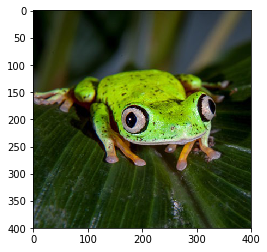

In [2]:
img = mpimg.imread('frogimg.jpg')
imgplot = plt.imshow(img)
plt.show()

In [3]:
#defining some methods
def convFilter(image, conv_filt):
    #the filter is applied to the whole image, it is a simple one. just a matrix multiplication
    
    #create a feature map variable to hold the results of the filter
    feature_map = numpy.zeros((image.shape[0],
                               image.shape[1], 
                               image.shape[2]))
    
    for row in numpy.int16(numpy.arange(0,image.shape[0] - conv_filt.shape[0], conv_filt.shape[0])): #this is going to be the row
        for col in numpy.int16(numpy.arange(0,image.shape[1] - conv_filt.shape[1], conv_filt.shape[1])):
            #here the matrix multiplication
            for i in range(0, conv_filt.shape[0]):
                for j in range (0, conv_filt.shape[1]):
                    #add depth here
                    for depth in range(0, image.shape[2]):
                        #feature_map[row + i][col + j][depth] = clamp(conv_filt[i][j] * image[row + i][col + j][depth], 0, 255)
                        feature_map[row + i][col + j][depth] = conv_filt[i][j] * image[row + i][col + j][depth]
                        # in this case i am not using a covolution fomula
                    
    return feature_map.astype(int)

def convolute(image, filters):
    featuremaps = []
    
    for filter_num in range(0, filters.shape[0]):
        featuremaps.append(convFilter(image, filters[filter_num]))
    
    return featuremaps

In [4]:
#defining filters
my_filters = numpy.zeros((2,3,3))

my_filters[0, :, :] = numpy.array([[-1, 0, 1], 
                                   [-1, 0, 1], 
                                   [-1, 0, 1]])

my_filters[1, :, :] = numpy.array([[-1, -1, -1], #sharpening filter
                                   [-1, 5, -1], 
                                   [-1, -1, -1]])

#final feature maps given by the two previous filters
img2 = convolute(img, my_filters)

### Relu activation function

In [5]:
def clamp(n, minn, maxn):
    return max(min(maxn, n), minn)

def relu(featuremaps):

    for maps in range(0, len(featuremaps)):
         for row in range(0, featuremaps[maps].shape[0]): #this is going to be the row
            for col in range(0, featuremaps[maps].shape[1]):
                for depth in range(0, featuremaps[maps].shape[2]):
                    featuremaps[maps][row][col][depth] = clamp(featuremaps[maps][row][col][depth], 0, 255)
    
    return featuremaps

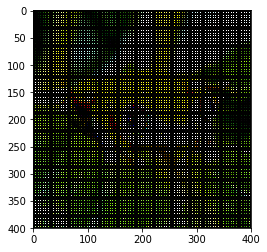

In [6]:
img3 = relu(img2)
imgplot = plt.imshow(img3[1])
plt.show()

### Max pooling function

In [7]:
def pool(f_map, maskWidth, maskHeight):
    
    #create a replacement for the old feature map
    new_feature_map = numpy.zeros((len(numpy.arange(0, f_map.shape[0]- maskWidth, maskWidth)),
                                   len(numpy.arange(0, f_map.shape[1]- maskHeight, maskHeight)), 
                                   f_map.shape[2]))
    
    
    indxrow = 0
    for row in numpy.int16(numpy.arange(0, f_map.shape[0] - maskWidth, maskWidth)): #this is going to be the row
        indxcol = 0
        for col in numpy.int16(numpy.arange(0, f_map.shape[1] - maskHeight, maskHeight)):
            
            #depth here
            for depth in range(0, f_map.shape[2]):
                maxPool = []
                
                for i in range(0, maskWidth):
                    for j in range (0, maskHeight):
                        maxPool.append( f_map[row + i][col + j][depth] )
                        
                new_feature_map[indxrow][indxcol][depth] = max(maxPool)
                
            indxcol = indxcol +1
        indxrow = indxrow +1 
    
    return new_feature_map
    

def pooling(f_maps, maskWidth, maskHeight):
    featuremaps = []
    
    for maps in range(0, len(f_maps)):
        featuremaps.append(pool(f_maps[maps], maskWidth, maskHeight))
        
    return featuremaps

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


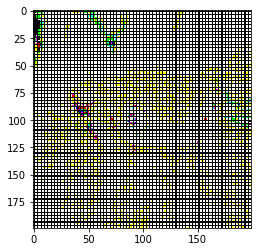

In [8]:
img4 = pooling(img3, 2, 2)
imgplot = plt.imshow(img4[1])
plt.show()

### Normalisation layer

In [27]:
# Modify the feature map such that its mean is zero and std is one
def norm(f_map):
    # Calculate mean and std for the feature map
    fm_mean = np.mean(f_map, dtype=np.float64)
    fm_std = np.std(f_map, dtype=np.float64)
    
    # And then normalise the data
    for row in range(0, f_map.shape[0]): #this is going to be the row
        for col in range(0, f_map.shape[1]):
            for depth in range(0, f_map.shape[2]):
                f_map[row][col][depth] = f_map[row][col][depth] - fm_mean
                f_map[row][col][depth] = f_map[row][col][depth]/fm_std
    
    return f_map

def normalisation(f_mapS):
    featuremaps = []
    
    for maps in range(0, len(f_mapS)):
        featuremaps.append(norm(f_mapS[maps]))
        
    return featuremaps

In [28]:
img5 = normalisation(img4)

### Flatten layer

In [ ]:
def flatten(f_mapS, output_nodes):
    # Link each of these to every node a stack of feature maps. 
    
    new_fmaps = []
    
    for f_map in range(0,len(f_mapS)):
        new_fmaps.append(np.reshape(f_mapS[f_map], f_mapS[f_map].shape[0]*f_mapS[f_map].shape[1]*f_mapS[f_map].shape[2]))
    
    
    return flat_layer